## Analysis of American Football betting and Superbowl Winners
##### Collaborators: Nicole Tran, Azwa Bajwah, and Evelyn Zhao


### Introduction
Every year in early February, no matter who or where you are in America, you will most likely hear about [the Super Bowl](https://en.wikipedia.org/wiki/Super_Bowl). The Super Bowl is one of [the largest broadcasted events in the United States and in 2024 alone generated over 123.4 million viewers](https://operations.nfl.com/updates/the-game/super-bowl-lviii-is-most-watched-telecast-in-history/#:~:text=Super%20Bowl%20LVIII%20is%20the%20most%2Dwatched%20program%20ever%2C%20averaging%20123.4%20million%20viewers%20across%20all%20platforms%2C%20up%20%2B7%25%20versus%20last%20year%27s%20Super%20Bowl%20which%20was%20the%20previous%20record%20(115.1%20million).), with over a billion dollars in revenue from ticket sales, advertisements, and broadcasting. Every year, hundreds of companies pay millions for [a 30-second advertisement](https://www.statista.com/topics/8999/super-bowl-advertising-in-the-us/#topicOverview:~:text=The%20result%3A%2030,in%20the%20text.) to play during ad breaks, making it one of the most expensive and lucrative advertising opportunities. That revenue does not include the billions of dollars in economic profit which also come from local businesses and betting. The Super Bowl is notably one of the largest and most profitable sports betting events in America. Every year, millions of Americans bet [billions of dollars altogether](https://www.pbs.org/newshour/nation/record-68-million-people-plan-on-making-super-bowl-bets#:~:text=Bettors%20plan%20to%20wager%20an%20estimated%20%2423.1%20billion%20on%20this%20year%E2%80%99s%20Super%20Bowl%2C%20up%20from%20%2416%20billion%20last%20year%2C%20the%20group%20predicted.) on matches throughout the season, but most importantly on the last match of the tournament. Apart from its obvious economic significance, the Super Bowl is also a display of American culture and is quite important socially. For millions of Americans, football is a hobby, a familial activity, and a career. The Super Bowl showcases this significance as it is often a time for families and friends to reconnect and make memories together. Given the economic and social significance of the Super Bowl, it is important to make informed decisions on betting, advertisement, or simply personally choosing which team to root for by using statistics of current and previous seasons' teams' winnings and losses. This is where data science is extremely useful. Using a collection of data, we can use the data science pipeline to analyze the history of bets, previous matches, and Super Bowls to provide useful information for future Super Bowls.

Over this tutorial, we will be going through the following:
1. Data Collection
2. Data Processing
3. Exploratory Analysis & Data Visualization
4. Modeling: Analysis, Hypothesis Testing, & Machine Learning
5. Interpretation: Insight & Next Steps

### Data Collection

At this stage, we must find an appropriate dataset relevant to the NFL and Superbowl winners.

Kaggle is a free-to-use site for data scientists to publish and share datasets and participate in data science challenges and competitions. There are many well-cleaned and sourced datasets collected by data scientists around the world, and we selected a relevant dataset for use in our project. Check out Kaggle [here!](https://www.kaggle.com/)

Using Kaggle we found a data set which includes various collections of data relating to NFL scores broken down by team and other features including weather and stadiums. Check out our data set [here.](https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data)

---

During this project, we will be using the Python language and tools such as Jupyter Notebook to develop this project. If you haven't heard about Jupyter notebooks before, make sure to learn more about them [here](https://jupyter.org/).

First, we start by importing libraries used for data collection and analysis.

#### Imports

In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from plotnine import *
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Throughout this tutorial, you will see how each of these imports will help collect, analyze, and display our data.

### Data Processing

As you can see from the CSV files provided by the Kaggle dataset, they are completely unreadable in their original form. Now that we have our imports, let's extract the CSV file into a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), which is a common data structure used to organize multidimensional data and their labels. This will allow us much more freedom when it comes to manipulating tabular data.

In [87]:
# retrieve data
team_data = pd.read_csv('nfl_teams.csv', encoding='ISO-8859-1')
scores_data = pd.read_csv('spreadspoke_scores.csv', encoding='ISO-8859-1')

Below, take a look at the team data. We will only need this DataFrame to match the team name to the team ID.

In [67]:
# display data
team_data.head(10)

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


We will primarily use and work with the scores dataframe, named `scores_data`.

In [68]:
# display data
scores_data.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
5,9/10/1966,1966,2,False,Houston Oilers,31,0,Oakland Raiders,NaN,NaN,NaN,Rice Stadium,False,77.0,6.0,82.0,NaN
6,9/10/1966,1966,2,False,San Diego Chargers,24,0,New England Patriots,NaN,NaN,NaN,Balboa Stadium,False,69.0,9.0,81.0,NaN
7,9/11/1966,1966,1,False,Atlanta Falcons,14,19,Los Angeles Rams,NaN,NaN,NaN,Atlanta-Fulton County Stadium,False,71.0,7.0,57.0,NaN
8,9/11/1966,1966,2,False,Buffalo Bills,20,42,Kansas City Chiefs,NaN,NaN,NaN,War Memorial Stadium,False,63.0,11.0,73.0,NaN
9,9/11/1966,1966,1,False,Detroit Lions,14,3,Chicago Bears,NaN,NaN,NaN,Tiger Stadium,False,67.0,7.0,73.0,NaN


### Explaining some columns:

#####  `spread_favorite`
In football betting, the term "spread favorite" refers to the team expected to win by a certain number of points as set by the betting odds. This team is typically considered stronger or in a better position to win the game, and the "spread" is the number of points by which bookmakers estimate the favorite is expected to outscore the underdog.

Example of a Point Spread Bet:
Suppose in an NFL game, the Green Bay Packers are playing against the Detroit Lions. If the Packers are listed as the "spread favorite," the listing might look something like this:

- Green Bay Packers -7.5
- Detroit Lions +7.5

This means that the Packers are favored to win by more than 7.5 points. For a bet on the Packers to pay out, they must win by 8 points or more. Conversely, a bet on the Lions would win if the Lions lose by 7 points or fewer, or if they win the game outright.

#####  `over_under_line`
In football betting, the "over/under" line, also known as the total, is a wager on the combined score of both teams in a game. This betting line sets a predicted total score by the oddsmakers, and bettors can wager whether the actual combined score of the game will be over or under that set number.

Example of an Over/Under Bet:
Suppose in an NFL game between the New England Patriots and the Miami Dolphins, the over/under line is set at 47.5 points. Here are the betting options:

- Over 47.5 Points: If you bet the over, you are predicting that the combined score of both teams will be 48 points or more.
- Under 47.5 Points: If you bet the under, you are predicting that the combined score will be 47 points or fewer.

If the final combined score is 48 points or more, the over bets win. If it is 47 points or fewer, the under bets win.

#####  `schedule_week`
In this data set, the schedule week is usually a number. However, superbowl games are labeled as "Superbowl" in the `schedule_week` column.

### List of SuperBowl Winners:
https://www.espn.com/nfl/superbowl/history/winners

### Cleaning


Now, to make data comparison a little easier, let's change `team_favorite_id` (the favored team for the game, labed by its ID) to just `team_favorite`. We will need to use a column from the `teams_data` dataframe to know which team ID corresponds to which team name.

In [69]:
# make a mapping dictionary. this will be a map that points the team id to the team name
mapping = team_data.set_index('team_id_pfr')['team_name'].to_dict()

# create a column called team_favorite
scores_data['team_favorite'] = scores_data['team_favorite_id'].map(mapping)

# drop the old column, team_favorite_id
scores_data.drop(columns='team_favorite_id', inplace=True)

Let's continue cleaning this dataframe by making a column that clearly states who won the game. Right now, this dataset only shows the home team, the away team, the home team score, and the away team score. It would be annoying to constantly calculate who won each game by comparing scores, so let's make a whole new column called `winning_team` that shows who won the game.

In [70]:
# make a function to compare the score_home and score_away
# returns the winning team
def determine_winner(row):
    if row['score_home'] > row['score_away']:
        return row['team_home']
    else:
        return row['team_away']

scores_data['winning_team'] = scores_data.apply(determine_winner, axis=1)

Our dataframe now looks like this:

In [71]:
scores_data.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_favorite,winning_team
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN,NaN,Oakland Raiders
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN,NaN,Houston Oilers
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN,NaN,San Diego Chargers
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN,NaN,New York Jets
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN,NaN,Green Bay Packers
5,9/10/1966,1966,2,False,Houston Oilers,31,0,Oakland Raiders,NaN,NaN,Rice Stadium,False,77.0,6.0,82.0,NaN,NaN,Houston Oilers
6,9/10/1966,1966,2,False,San Diego Chargers,24,0,New England Patriots,NaN,NaN,Balboa Stadium,False,69.0,9.0,81.0,NaN,NaN,San Diego Chargers
7,9/11/1966,1966,1,False,Atlanta Falcons,14,19,Los Angeles Rams,NaN,NaN,Atlanta-Fulton County Stadium,False,71.0,7.0,57.0,NaN,NaN,Los Angeles Rams
8,9/11/1966,1966,2,False,Buffalo Bills,20,42,Kansas City Chiefs,NaN,NaN,War Memorial Stadium,False,63.0,11.0,73.0,NaN,NaN,Kansas City Chiefs
9,9/11/1966,1966,1,False,Detroit Lions,14,3,Chicago Bears,NaN,NaN,Tiger Stadium,False,67.0,7.0,73.0,NaN,NaN,Detroit Lions


#### Creating and Cleaning Betting Data 
To analyze betting patterns, we will copy the current `scores_data` dataframe and build off of it to create a betting dataframe called `betting_df`. 

Since we only care about bets for this dataframe, we will remove all empty or NaN values.

In [72]:
# make separate dataframe to see spread betting
betting_df = scores_data

# replace empty space with NaN
betting_df['over_under_line'] = betting_df['over_under_line'].replace(' ', np.nan)
# Convert 'over_under_line' to float
betting_df['over_under_line'] = betting_df['over_under_line'].astype(float)
# remove all games that have NaN
betting_df = betting_df.dropna(subset=['spread_favorite', 'over_under_line', 'team_favorite'])
# remove all games that have "PICK" as team_favorite, which means that it is an equal matchup
betting_df = betting_df[betting_df['team_favorite'] != 'PICK']

betting_df.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_favorite,winning_team
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,-12.0,39.0,Tulane Stadium,True,55.0,14.0,84.0,rain,Minnesota Vikings,Kansas City Chiefs
1105,1/16/1972,1971,Superbowl,True,Dallas Cowboys,24,3,Miami Dolphins,-6.0,34.0,Tulane Stadium,True,34.0,18.0,40.0,NaN,Dallas Cowboys,Dallas Cowboys
1294,1/14/1973,1972,Superbowl,True,Miami Dolphins,14,7,Washington Redskins,-1.0,33.0,Los Angeles Memorial Coliseum,True,64.0,7.0,53.0,NaN,Miami Dolphins,Miami Dolphins
1483,1/13/1974,1973,Superbowl,True,Miami Dolphins,24,7,Minnesota Vikings,-6.5,33.0,Rice Stadium,True,47.0,7.0,81.0,NaN,Miami Dolphins,Miami Dolphins
1672,1/12/1975,1974,Superbowl,True,Minnesota Vikings,6,16,Pittsburgh Steelers,-3.0,33.0,Tulane Stadium,True,51.0,17.0,72.0,NaN,Pittsburgh Steelers,Pittsburgh Steelers
1861,1/18/1976,1975,Superbowl,True,Dallas Cowboys,17,21,Pittsburgh Steelers,-7.0,36.0,Orange Bowl,True,49.0,18.0,44.0,NaN,Pittsburgh Steelers,Pittsburgh Steelers
2267,1/15/1978,1977,Superbowl,True,Dallas Cowboys,27,10,Denver Broncos,-6.0,39.0,Louisiana Superdome,True,72.0,0.0,NaN,indoor,Dallas Cowboys,Dallas Cowboys
2500,1/21/1979,1978,Superbowl,True,Dallas Cowboys,31,35,Pittsburgh Steelers,-3.5,37.0,Orange Bowl,True,71.0,18.0,84.0,rain,Pittsburgh Steelers,Pittsburgh Steelers
2502,9/2/1979,1979,1,False,Buffalo Bills,7,9,Miami Dolphins,-5.0,39.0,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN,Miami Dolphins,Miami Dolphins
2503,9/2/1979,1979,1,False,Chicago Bears,6,3,Green Bay Packers,-3.0,31.0,Soldier Field,False,78.0,11.0,68.0,NaN,Chicago Bears,Chicago Bears


Now, let's do the same thing for this dataframe and create additional columns that will make data analysis and visualization much easier.

Let's first start by determining which spread bet would have won by examining who won and the score difference.

In [73]:
# function to find out which team bet would have won
def determine_spread_winner(row):
    if row['team_favorite'] != row['winning_team']:
        return row['winning_team']
    else:
        point_diff = row['score_home'] - row['score_away']
        if abs(point_diff) > abs(row['spread_favorite']):
            return row['team_favorite']
        else:
            if row['team_favorite'] == row['team_home']:
                return row['team_away']
            else:
                return row['team_home']
            
# make a column to determine which bet would have won
betting_df['spread_bet_winner'] = betting_df.apply(determine_spread_winner, axis=1)

And now, the same thing for the over/under betting - we will create a column that shows whether betting over or under would have won.

In [89]:
# function to find out over or under
def determine_over_under(row):
    total_score = row['score_home'] + row['score_away']
    if total_score > row['over_under_line']:
        return 'Over'
    elif total_score < row['over_under_line']:
        return 'Under'
    else:
        return 'Push'  # Optionally handle the exact match case

# make a column to determine if betting over or under won
betting_df['over_under_winner'] = betting_df.apply(determine_over_under, axis=1)

Our betting dataframe now looks like this:

In [90]:
betting_df.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,spread_favorite,over_under_line,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_favorite,winning_team,spread_bet_winner,over_under_winner,relationship_category
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,-12.0,39.0,...,True,55.0,14.0,84.0,rain,Minnesota Vikings,Kansas City Chiefs,Kansas City Chiefs,Under,Winning Team but\nnot Favorite
1105,1/16/1972,1971,Superbowl,True,Dallas Cowboys,24,3,Miami Dolphins,-6.0,34.0,...,True,34.0,18.0,40.0,NaN,Dallas Cowboys,Dallas Cowboys,Dallas Cowboys,Under,Both Winning Team\nand Favorite
1294,1/14/1973,1972,Superbowl,True,Miami Dolphins,14,7,Washington Redskins,-1.0,33.0,...,True,64.0,7.0,53.0,NaN,Miami Dolphins,Miami Dolphins,Miami Dolphins,Under,Both Winning Team\nand Favorite
1483,1/13/1974,1973,Superbowl,True,Miami Dolphins,24,7,Minnesota Vikings,-6.5,33.0,...,True,47.0,7.0,81.0,NaN,Miami Dolphins,Miami Dolphins,Miami Dolphins,Under,Both Winning Team\nand Favorite
1672,1/12/1975,1974,Superbowl,True,Minnesota Vikings,6,16,Pittsburgh Steelers,-3.0,33.0,...,True,51.0,17.0,72.0,NaN,Pittsburgh Steelers,Pittsburgh Steelers,Pittsburgh Steelers,Under,Both Winning Team\nand Favorite
1861,1/18/1976,1975,Superbowl,True,Dallas Cowboys,17,21,Pittsburgh Steelers,-7.0,36.0,...,True,49.0,18.0,44.0,NaN,Pittsburgh Steelers,Pittsburgh Steelers,Dallas Cowboys,Over,Neither
2267,1/15/1978,1977,Superbowl,True,Dallas Cowboys,27,10,Denver Broncos,-6.0,39.0,...,True,72.0,0.0,NaN,indoor,Dallas Cowboys,Dallas Cowboys,Dallas Cowboys,Under,Both Winning Team\nand Favorite
2500,1/21/1979,1978,Superbowl,True,Dallas Cowboys,31,35,Pittsburgh Steelers,-3.5,37.0,...,True,71.0,18.0,84.0,rain,Pittsburgh Steelers,Pittsburgh Steelers,Pittsburgh Steelers,Over,Both Winning Team\nand Favorite
2502,9/2/1979,1979,1,False,Buffalo Bills,7,9,Miami Dolphins,-5.0,39.0,...,False,74.0,15.0,74.0,NaN,Miami Dolphins,Miami Dolphins,Buffalo Bills,Under,Neither
2503,9/2/1979,1979,1,False,Chicago Bears,6,3,Green Bay Packers,-3.0,31.0,...,False,78.0,11.0,68.0,NaN,Chicago Bears,Chicago Bears,Green Bay Packers,Under,Neither


### Exploratory Analysis and Data Visualization

In [91]:
# finding & plotting top 5 teams according to number of superbowl wins
# Count the wins for each team and grab the top 10
top_teams = superbowl_games['winning_team'].value_counts().head(10)

# Plotting the wins
top_teams.plot(kind='bar')
plt.title('Top 10 Super Bowl Wins')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'superbowl_games' is not defined

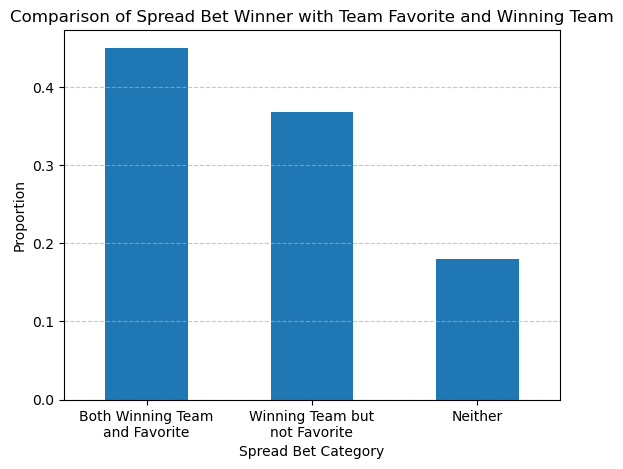

In [93]:
# plotting betting columns - first plot spread
# plot by how often the spread bet winner is the same as:
# 1. the team favorite
# 2. the winning team
# 3. both team favorite and winning team
# 4. neither

def categorize_relationship(row):
    is_favorite_winner = row['spread_bet_winner'] == row['team_favorite']
    is_winning_winner = row['spread_bet_winner'] == row['winning_team']
    
    if is_favorite_winner and is_winning_winner:
        return 'Both Winning Team\nand Favorite'
    elif is_winning_winner:
        return 'Winning Team but\nnot Favorite'
    else:
        return 'Neither'

betting_df['relationship_category'] = betting_df.apply(categorize_relationship, axis=1)

category_counts = betting_df['relationship_category'].value_counts()

# Normalize the counts to get the proportion of each category
category_proportions = category_counts / category_counts.sum()

# Plotting the categories
category_proportions.plot(kind='bar')
plt.title('Comparison of Spread Bet Winner with Team Favorite and Winning Team')
plt.xlabel('Spread Bet Category')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Plot Analysis 

As shown above, the spread bet winner is both the team that was favored to win and the actual winning team, or the spread bet winner is the actual winning team but was not the favorite. Since the proportion is >0.45, we can see that nearly half of the time, the spread bet winner is both the team that was favored to win and the team that actually won. This shows us that the spread bet predictions are reasonably accurate when the favorite team also wins the game. Our second bar also shows us that 38% of the time, the spread bet winner is the actual winner when the team wasn't favored to win before the game. This gives us important insights and shows us that while favorites are often good choices, there is a substantial number of instances where the underdog or non-favorite team wins the game. This also shows us that football, like many sports, is inherently unpredictable. Overall, this plot shows us a strong correlation between the spread bet outcome and the actual game outcome.

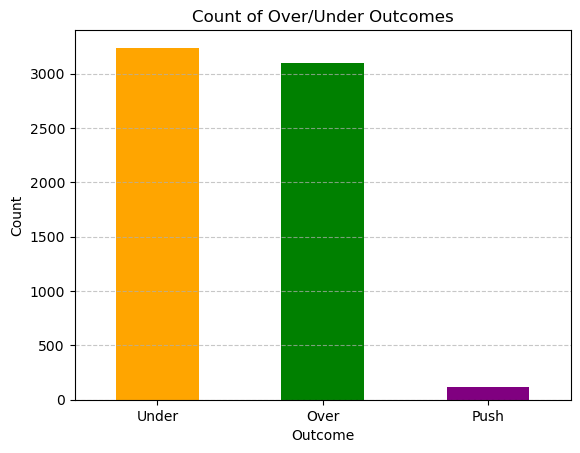

In [94]:
# plotting betting columns - plotting the over/under
# count up the number of over and under and compare

over_under_counts = betting_df['over_under_winner'].value_counts()

over_under_counts.plot(kind='bar', color=['orange', 'green', 'purple'])
plt.title('Count of Over/Under Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Horizontal x-ticks for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Plot Analysis 

As shown above, the number of under versus over outcomes is extremely similar, indicating a balanced distribution between the two. This balance suggests that the betting outcomes based on over/under predictions may not strongly correlate with predicting the winner of the Super Bowl or other sporting events. It also highlights the accuracy in betters predictions and a generally balanced betting outcomes. This also shows the importance of considering other factors beyond over/under betting outcomes when making predictions or analyzing betting trends and Super Bowl winners.

### Modeling: Analysis, Hypothesis Testing, & Machine Learning

In this section, we'll try to predict who will win the Superbowl based on their seasonal winrate and seasonal average point difference. Since this is one of the most common tools to place bets.

First, I'll create a database for the by season by team stats by taking the data from all the games, grouping by schedule_season and team_home, and getting the winrate. I also make a database for the average point difference for each team per season. 

For the first database, we'll need to determine a winner, so we'll add another column for winner calculated based on which team got the most points.

In [79]:
# load data
data = pd.read_csv('spreadspoke_scores.csv')

# get relevant columns for each game
game_data = data[['schedule_season', 'team_home', 'score_home', 'team_away', 'score_away']].copy()

# get the winner for each game
game_data['winner'] = game_data.apply(lambda x: x['team_home'] if x['score_home'] > x['score_away'] else x['team_away'], axis=1)

# group by season and team to count wins and games played
def calculate_team_stats(group):
    return pd.Series({
        'total_wins': (group['winner'] == group['team_home']).sum(),
        'total_games': len(group)
    })

team_season_summary = game_data.groupby(['schedule_season', 'team_home'], as_index=False).apply(calculate_team_stats).reset_index(drop=True)
team_season_summary.rename(columns={'team_home': 'team'}, inplace=True)

# calculate win rate for each team and season
team_season_summary['win_rate'] = team_season_summary['total_wins'] / team_season_summary['total_games']

# calculate the score diff for each game
game_data['score_difference'] = abs(game_data['score_home'] - game_data['score_away'])

# group by season and team to calculate average score difference
team_season_avg_score_diff = game_data.groupby(['schedule_season', 'team_home'], as_index=False)['score_difference'].mean()
team_season_avg_score_diff.rename(columns={'team_home': 'team', 'score_difference': 'avg_score_difference'}, inplace=True)


C:\Users\azwab\AppData\Local\Temp\ipykernel_10612\1904532693.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


Now, we merge the databases.

In [80]:
# merge
team_season_stats = pd.merge(team_season_summary, team_season_avg_score_diff, on=['team', 'schedule_season'], how='inner')

team_season_stats.head()

,schedule_season,team,total_wins,total_games,win_rate,avg_score_difference
0,1966,Atlanta Falcons,1,7,0.142857,21.285714
1,1966,Baltimore Colts,5,7,0.714286,15.428571
2,1966,Boston Patriots,4,7,0.571429,9.142857
3,1966,Buffalo Bills,4,8,0.500000,15.625000
4,1966,Chicago Bears,4,7,0.571429,9.142857


Now, we start to build our logistic regression model. First, we select the teams that made it to the Super Bowl to determine the teams to label with probability 1 for attending the Super Bowl, and set the rest of the teams to 0, because they didn't make it.

In [81]:
#logistic model to predict each team's probability of being in the superbowl

#find which teams made it to the super bowl each season (teams in the superbowl, keep those columns)
super_bowl_teams = data.loc[data['schedule_week'] == 'Superbowl', ['schedule_season', 'team_home']]

# merge that df with the team season stats df
team_season_stats['made_super_bowl'] = team_season_stats.apply(lambda x: 1 if (x['team'], x['schedule_season']) in zip(super_bowl_teams['team_home'], super_bowl_teams['schedule_season']) else 0, axis=1)

Next, we set the features we want to predict from (avg score difference and win rate) and the target variable we want to get (the probability of making the Super Bowl).

In [82]:
# set features (win rate and average score difference) and target var (made_super_bowl)
X = team_season_stats[['win_rate', 'avg_score_difference']]
y = team_season_stats['made_super_bowl']

Next, we split the data into training and test sets (80:20 is pretty standard) and initialize the log reg model.

In [83]:
# split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# initialize logistic regression model
model = LogisticRegression()

To do cross validation of our model, kfold is suitable. We pick k=5 as a good starting point. We then run the model on each split and save the accuracy scores for each in a list.

In [84]:
#k-fold cross-validation (5 fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# store results
accuracy_list = []
reports = []

# k-fold cross-validation in action!
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] #for each split, set the train and test block
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train the model
    model.fit(X_train, y_train)

    # predict based on the test fold
    predictions = model.predict(X_test)

    # check accuracy using the default sklearn accuracy metric
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)

    # store results
    accuracy_list.append(accuracy)
    reports.append(report)

c:\Users\azwab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\azwab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\azwab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\azwab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Next, to summarize our findings, we get the average of the accuracies and print results per fold.

In [85]:
# calculate average accuracy
average_accuracy = np.mean(accuracy_list)
print(f'Average Accuracy: {average_accuracy:.4f}')

# print results per fold
for i in range(len(accuracy_list)):
    print(f"\nFold {i+1}")
    print(f"Accuracy: {accuracy_list[i]:.4f}")

Average Accuracy: 0.9660

Fold 1
Accuracy: 0.9649

Fold 2
Accuracy: 0.9589

Fold 3
Accuracy: 0.9707

Fold 4
Accuracy: 0.9736

Fold 5
Accuracy: 0.9619


We can visualize this data with a graph to compare splits.

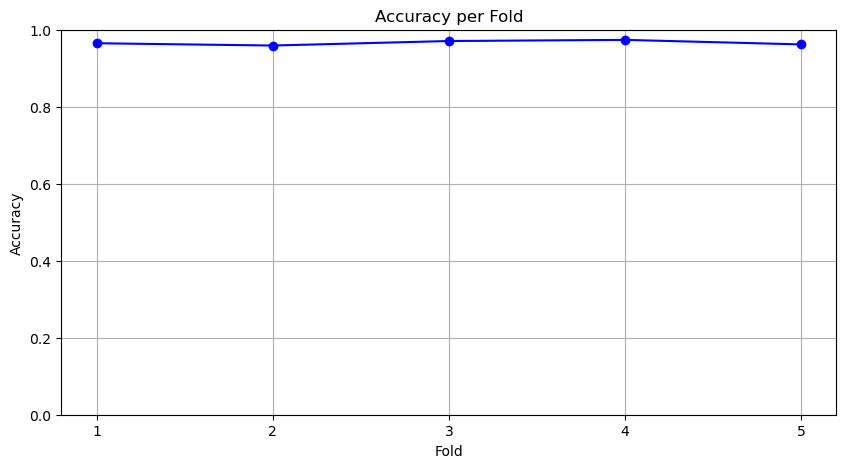

In [86]:
#plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy_list) + 1), accuracy_list, marker='o', linestyle='-', color='b')
plt.title('Accuracy per Fold')
plt.xlabel('Fold')
plt.xticks(range(1,6))
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

#### Plot Analysis

Our plot shows the average accuracy per fold. The overall average accuracy of our model across all folds is 0.7415, which suggests that our model on average correctly predicts the class of the samples approximately 74.15% of the time across all folds. 
Each fold represents a different parition of our data. Generally our model shows consistent accuracy across all folds suggesting that it generalizes across different subsets well. 
Finally this means that our model is running well on our training and validation data, meaning it can help us create an informed decision in the future.

### Interpretation: Insight
Using the knowledge we've gained about the spread bet winner based on the winning and favorite teams, and the differences observed in over/under outcomes, while utilizing our predictive model based on win rate and average score differences, we can enhance betting strategies for future Super Bowls. For those interested in betting on the Super Bowl, as demonstrated in our tutorial, there is great potential for successful bets using predictors, particularly predicting who will win the Super Bowl. As shown by our accuracy per fold, our model is quite effective at predicting outcomes and can be even more useful in the future. By refining our data and further training our model on more features and more data, we can make even better bets in the long run. Although bettors should be mindful of the inherent unpredictable nature of football; as our exploratory data analysis has shown us, ultimately we cannot predict everything about a football game, thus our model and bets can be unsuccessful at times. However, generally our model and knowledge pprovides bettors with ample support to make more accurate bets.



### Next Steps
Since the Super Bowl is annual and consistently growing in viewership and social and economic impact, it is only natural to use machine learning tools to predict future outcomes of the Super Bowl in advance. Using two features, we have seen that average season win rate and average point difference can be useful in predicting which teams are likely to be within the top four at the end of the season. Additionally, as more games occur and more data is collected on different features, including specifics on player performance as it relates to a team's likelihood of ending up at the Super Bowl, we can further refine our model for even better predictions.

However, it's important to note that for a more detailed and accurate analysis, it's best to involve more features and [datasets](https://www.nfl.com/stats/player-stats) on teams, players, and coaches. What we have is a rudimentary but fairly accurate model given the data we have, but there is always room for improvement.